In [6]:
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch import nn

In [7]:
#set weight and bias
weight = 0.3
bias = 0.9
X = torch.arange(0, 1, 0.02).unsqueeze(dim = 1)
y = weight * X + bias

In [8]:
#train test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

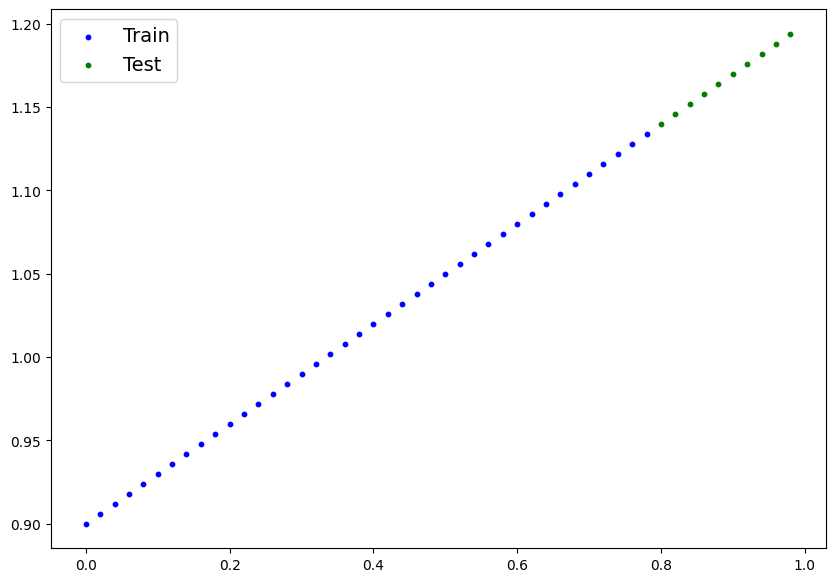

In [9]:
#plotting
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = "b", s = 10, label = "Train")
plt.scatter(X_test, y_test, c = "g", s = 10, label = "Test")
plt.legend(prop = {"size":14})
plt.show()

In [10]:
#building model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))
    
    def forward(self, x):
        return self.weights * x + bias

In [11]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
#loss function
loss_fn = nn.L1Loss()

In [14]:
#optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.01)

In [15]:
torch.manual_seed(42)
train_loss_values = []
test_loss_values = []
epochs = 300
epoch_count = []

#training and validation
for epoch in range(epochs):
    model_0.train()
    train_preds = model_0(X_train)
    train_loss = loss_fn(train_preds, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_preds = model_0(X_test)
        test_loss = loss_fn(test_preds, y_test)
        if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.014309240505099297 | MAE Test Loss: 0.02918342314660549
Epoch: 20 | MAE Train Loss: 0.0009007349726743996 | MAE Test Loss: 0.0014154911041259766
Epoch: 40 | MAE Train Loss: 0.0009007349726743996 | MAE Test Loss: 0.0014154911041259766
Epoch: 60 | MAE Train Loss: 0.0009007349726743996 | MAE Test Loss: 0.0014154911041259766
Epoch: 80 | MAE Train Loss: 0.0009007349726743996 | MAE Test Loss: 0.0014154911041259766
Epoch: 100 | MAE Train Loss: 0.0009007349726743996 | MAE Test Loss: 0.0014154911041259766
Epoch: 120 | MAE Train Loss: 0.0009007349726743996 | MAE Test Loss: 0.0014154911041259766
Epoch: 140 | MAE Train Loss: 0.0009007349726743996 | MAE Test Loss: 0.0014154911041259766
Epoch: 160 | MAE Train Loss: 0.0009007349726743996 | MAE Test Loss: 0.0014154911041259766
Epoch: 180 | MAE Train Loss: 0.0009007349726743996 | MAE Test Loss: 0.0014154911041259766
Epoch: 200 | MAE Train Loss: 0.0009007349726743996 | MAE Test Loss: 0.0014154911041259766
Epoch: 220 | MAE Tr

In [16]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[1.1382],
        [1.1441],
        [1.1501],
        [1.1560],
        [1.1620],
        [1.1679],
        [1.1739],
        [1.1798],
        [1.1858],
        [1.1917]])

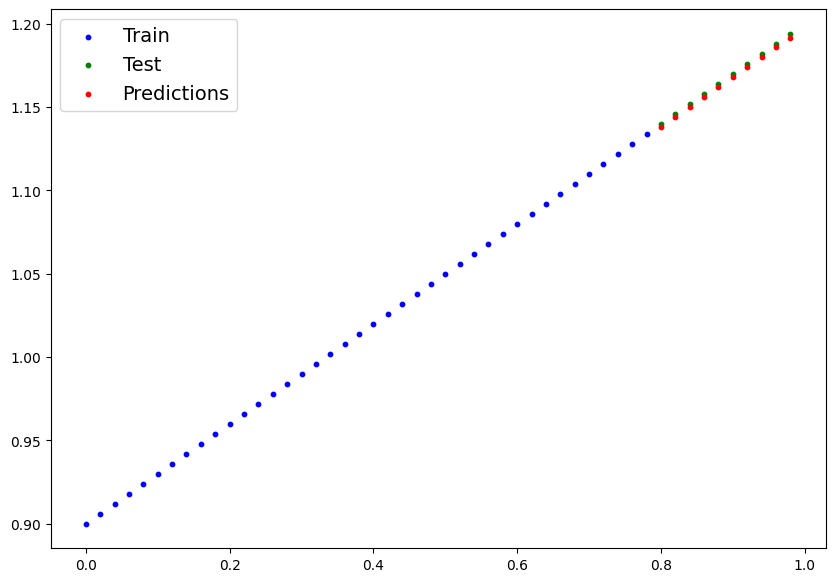

In [17]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = "b", s = 10, label = "Train")
plt.scatter(X_test, y_test, c = "g", s = 10, label = "Test")
plt.scatter(X_test, y_preds, c = "r", s = 10, label = "Predictions")
plt.legend(prop = {"size":14})
plt.show()

In [18]:
from pathlib import Path

In [19]:
model_path = Path("models")
model_path.mkdir(parents  =True, exist_ok = True)

In [20]:
model_name = "exercise_model_0"
model_save_path = model_path / model_name

In [21]:
print(f"saving model to: {model_save_path}")
torch.save(obj = model_0.state_dict(), f = model_save_path)

saving model to: models\exercise_model_0


In [22]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [24]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2977])), ('bias', tensor([0.1288]))])

In [26]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [27]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])